In [241]:
from TTS.utils.synthesizer import Synthesizer
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [242]:
tts_path = "/Users/tindelllockett/Library/Application Support/tts/tts_models--en--vctk--vits/model_file.pth"
tts_config_path = "/Users/tindelllockett/Library/Application Support/tts/tts_models--en--vctk--vits/config.json"
speakers_file_path = "/Users/tindelllockett/Library/Application Support/tts/tts_models--en--vctk--vits/speaker_ids.json"

In [243]:
# Define text, model name, speaker index, and output path
text = "hello world; this is an example sentence"
text = "Tteokbokki is a popular Korean dish consisting of cylindrical rice cakes, typically 2-3 inches long, bathed in a vibrant red, glossy sauce."
speaker_idx = "p225"
out_path = "out.wav"

In [244]:


# Initialize the synthesizer
synthesizer = Synthesizer(
        tts_checkpoint=tts_path,
        tts_config_path=tts_config_path,
        tts_speakers_file=speakers_file_path,
        use_cuda=False,
    );



 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


In [245]:
synthesizer.tts_model.speaker_manager.speaker_names[:4]

['ED\n', 'p225', 'p226', 'p227']

In [246]:
output = synthesizer.tts(text=text,speaker_name="p225",return_extra_outputs=True)
Audio(output[0], rate=22050)

 > Text splitted to sentences.
['Tteokbokki is a popular Korean dish consisting of cylindrical rice cakes, typically 2-3 inches long, bathed in a vibrant red, glossy sauce.']
 > Processing time: 2.980879783630371
 > Real-time factor: 0.29748895298831235


In [247]:
0.7584009170532227 / 0.23577064376584084

3.2166893424036282

In [248]:
tokens = synthesizer.tts_model.tokenizer.text_to_ids(text)
pre_tokenized_text_blnk = [synthesizer.tts_model.tokenizer.decode([y]) for y in tokens]
# replace <blnk> with space
pre_tokenized_text = [x if x != '<BLNK>' else '_' for x in pre_tokenized_text_blnk]
space_indices = [i for i, phoneme in enumerate(pre_tokenized_text) if phoneme == ' ']
space_indices = [0] + space_indices
space_indices


[0,
 31,
 37,
 41,
 61,
 79,
 89,
 111,
 117,
 143,
 155,
 171,
 189,
 209,
 221,
 237,
 251,
 265,
 271,
 275,
 295,
 307,
 321]

In [249]:
phoneme_durations = output[1]['outputs']['durations'].squeeze()
phoneme_timestamps = np.cumsum(phoneme_durations.squeeze())
phoneme_durations



tensor([ 3.,  3.,  3.,  2.,  1.,  2.,  1.,  3.,  1.,  1.,  1.,  3.,  1.,  2.,
         6.,  1.,  3.,  1.,  4.,  2.,  1.,  1.,  2.,  3.,  1.,  3.,  4.,  1.,
         3.,  6.,  1.,  1.,  9.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  2.,  3.,
         1.,  1.,  4.,  2.,  3.,  4.,  1.,  3.,  4.,  1.,  3.,  2.,  2.,  3.,
         2.,  1.,  4.,  3.,  3.,  1.,  3.,  1.,  1.,  2.,  2.,  5.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,
         4.,  1.,  2.,  2.,  3.,  1.,  3.,  1.,  3.,  2.,  5.,  1.,  5.,  1.,
         3.,  1.,  5.,  2.,  4.,  4.,  3.,  2.,  1.,  5.,  1.,  4.,  1.,  1.,
         2.,  2.,  3.,  4.,  1.,  1.,  1.,  5.,  3.,  1.,  2.,  1.,  2.,  1.,
         3.,  1.,  3.,  1.,  2.,  1.,  1.,  2.,  3.,  1.,  3.,  2.,  1.,  3.,
         1.,  3.,  3.,  3.,  3.,  1.,  1.,  5.,  1.,  2.,  3.,  1.,  2.,  2.,
         3.,  1.,  2.,  2.,  5.,  1.,  8.,  2.,  1.,  3.,  3.,  1.,  1.,  6.,
         5.,  1.,  4.,  6.,  1.,  3.,  2.,  1.,  3.,  1.,  5.,  

In [250]:
word_timestamps = []
start_idx = 0
word_timestamps = [float(phoneme_timestamps[space_idx]) for space_idx in space_indices]
word_timestamps[0] = 0.0

word_timestamps

[0.0,
 71.0,
 88.0,
 96.0,
 144.0,
 176.0,
 197.0,
 255.0,
 268.0,
 321.0,
 346.0,
 397.0,
 440.0,
 481.0,
 501.0,
 543.0,
 606.0,
 631.0,
 640.0,
 645.0,
 685.0,
 720.0,
 756.0]

In [251]:
# zip pre_tokenized_text and phoneme_timestamps
paired_tokens_timestamps = list(zip(pre_tokenized_text, phoneme_timestamps))
paired_tokens_timestamps[:14]

[('_', tensor(3.)),
 ('t', tensor(6.)),
 ('_', tensor(9.)),
 ('ˈ', tensor(11.)),
 ('_', tensor(12.)),
 ('i', tensor(14.)),
 ('_', tensor(15.)),
 ('ː', tensor(18.)),
 ('_', tensor(19.)),
 ('ɾ', tensor(20.)),
 ('_', tensor(21.)),
 ('ɪ', tensor(24.)),
 ('_', tensor(25.)),
 ('ˈ', tensor(27.))]

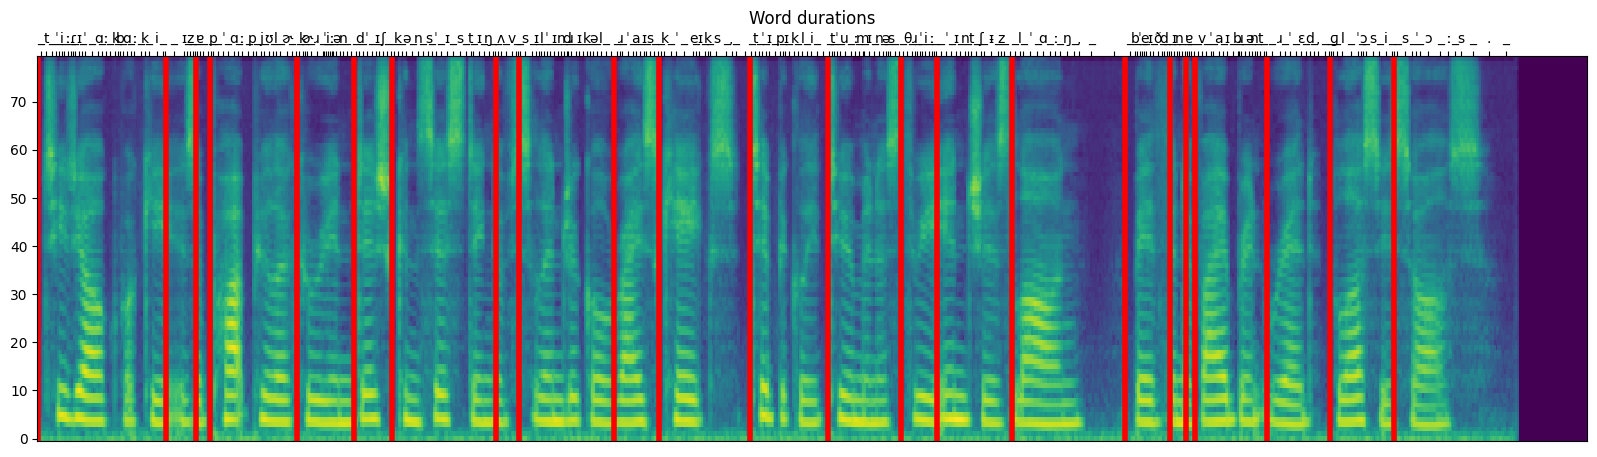

In [252]:
# plot the spectrogram
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output[0]))

# plot the spectrogram with xticks
spec = synthesizer.tts_model.ap.melspectrogram(np.array(output[0]))
plt.figure(figsize=(20,5))
plt.imshow(spec, origin="lower", aspect='auto', interpolation='none')
# create labels at the xticks
# plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()), pre_tokenized_text, rotation=0)
# shift the xticks to the middle of the bins
plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()[0][0]) - output[1]["outputs"]["durations"].cpu().numpy()[0][0] / 2, pre_tokenized_text, rotation=0)
# draw a vertical line for each token
for x in word_timestamps:
    plt.axvline(x, color="red", linewidth=4)

plt.gca().xaxis.tick_top()
plt.title("Word durations")
plt.show()

In [253]:
beep = np.sin(2 * np.pi * 1000 * np.arange(0, 0.1, 1/22050))
len(beep)
Audio(beep, rate=22050)

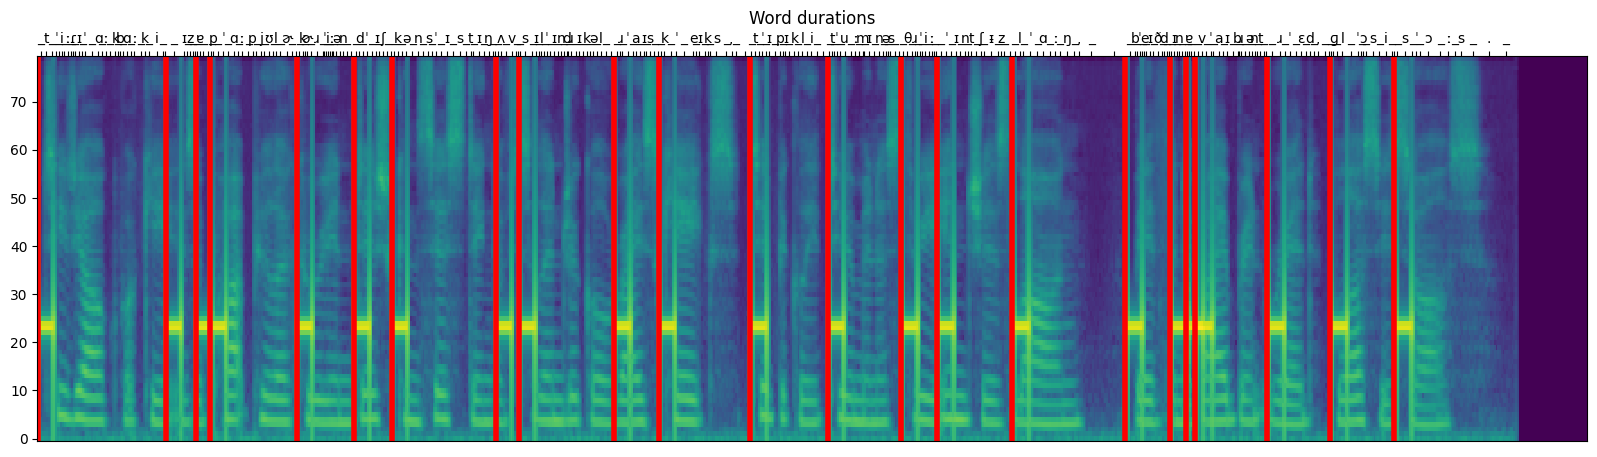

In [254]:
# Get the audio samples from the synthesizer
audio_samples = np.array(output[0])

# Convert the word start timestamps to sample indices
word_sample_indices = [int(start/86. * 22050) for start in word_timestamps]

# Insert the beep at each word start
for start_sample in word_sample_indices:
    end_sample = start_sample + len(beep)
    if end_sample > len(audio_samples):
        end_sample = len(audio_samples)
        beep = beep[:end_sample - start_sample]  # Truncate beep if necessary
    audio_samples[start_sample:end_sample] += beep


# plot the spectrogram
spec = synthesizer.tts_model.ap.melspectrogram(np.array(audio_samples))

# plot the spectrogram with xticks
spec = synthesizer.tts_model.ap.melspectrogram(np.array(audio_samples))
plt.figure(figsize=(20,5))
plt.imshow(spec, origin="lower", aspect='auto', interpolation='none')
# create labels at the xticks
# plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()), pre_tokenized_text, rotation=0)
# shift the xticks to the middle of the bins
plt.xticks(np.cumsum(output[1]["outputs"]["durations"].cpu().numpy()[0][0]) - output[1]["outputs"]["durations"].cpu().numpy()[0][0] / 2, pre_tokenized_text, rotation=0)
# draw a vertical line for each token
for x in word_timestamps:
    plt.axvline(x, color="red", linewidth=4)

plt.gca().xaxis.tick_top()
plt.title("Word durations")
plt.show()

# Play the modified audio
Audio(audio_samples, rate=22050)


In [271]:
import cv2

# Settings
width, height = 1280, 720
text = "Example"
font_scale = 2
font_color = (255, 255, 255)
font_thickness = 2

# Create a blank image (black background)
frame = np.zeros((height, width, 3), dtype=np.uint8)

# Set font
font = cv2.FONT_HERSHEY_SIMPLEX

# Calculate text position to center the text
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_x = (frame.shape[1] - text_size[0]) // 2
text_y = (frame.shape[0] + text_size[1]) // 2

# Put the text on the image
cv2.putText(frame, text, (text_x, text_y), font, font_scale, font_color, font_thickness)

# Create video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 30.0, (width, height))

# Write the same frame 30 times (for 1 second at 30fps)
for _ in range(30):
    out.write(frame)

# Release resources
out.release()

print("Video created successfully.")


Video created successfully.


In [264]:
from moviepy.editor import *
import cv2

# Define parameters for the text display
height, width = 480, 640
position = (50, 240)
font = cv2.FONT_HERSHEY_SIMPLEX
size = 1
color = (255, 255, 255)
thickness = 2

# Split the text into words
words = text.split()

# Function to make a frame with the given word
def make_frame(t, word):
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    frame = cv2.putText(frame, word, position, font, size, color, thickness)
    return frame

# Function to generate a word clip
def generate_word_clip(start_time, end_time, word):
    return VideoClip(lambda x: make_frame(x, word), duration=(end_time - start_time)).set_start(start_time)

# Load the audio object as an AudioFileClip
audio = AudioClip(lambda t: output2[0][int(22050 * t):int(22050 * (t + 0.1))], fps=22050, duration=len(output2[0])/22050.0)

# Generate word clips based on the word timestamps
word_clips = []
for i, word in enumerate(words):
    start_time = word_timestamps[i]
    end_time = word_timestamps[i + 1] if i < len(words) - 1 else audio.duration
    word_clips.append(generate_word_clip(start_time, end_time, word))

final_video = concatenate_videoclips(word_clips)
final_video = final_video.set_audio(audio)

# Write the video to a file
final_video.write_videofile('output_video.mp4', fps=24)


chunk:   1%|          | 1/141 [00:29<1:09:11, 29.65s/it, now=None]

Moviepy - Building video output_video.mp4.
Moviepy - Writing video output_video.mp4



TypeError: must be real number, not NoneType